# ML-Fundamentals - Neural Networks - Exercise: Minimal Fully Connected Network for MNIST

## Table of Contents
* [Requirements](#Requirements) 
  * [Modules](#Python-Modules) 
  * [Data](#Data)
* [Simple MNIST Network](#Simple-MNIST-Network)
  * [Todo: Transparency](#Todo:-Transparency)
  * [Todo: Comprehension](#Todo:-Comprehension)
  * [Todo: Step towards a NN-Framework](#Todo:-Step-towards-a-NN-Framework)

# Requirements


## Python-Modules

In [1]:
# third party
import numpy as np
import matplotlib.pyplot as plt

# internal
from deep_teaching_commons.data.fundamentals.mnist import Mnist

## Data

In [2]:
# create mnist loader from deep_teaching_commons
mnist_loader = Mnist(data_dir='data')

# load all data, labels are one-hot-encoded, images are flatten and pixel squashed between [0,1]
train_images, train_labels, test_images, test_labels = mnist_loader.get_all_data(one_hot_enc=True, normalized=True)

# shuffle training data
shuffle_index = np.random.permutation(60000)
train_images, train_labels = train_images[shuffle_index], train_labels[shuffle_index]

auto download is active, attempting download
mnist data directory already exists, download aborted


# Simple MNIST Network
The presented network is an adaptation of Michael Nielson's introductory example to neural networks. It is recommended, though not necessary, to read the first two chapters of his great online book ['Neural Networks and Deep Learning'](http://neuralnetworksanddeeplearning.com/) for a better understanding of the given example. Compared to the [original](https://github.com/mnielsen/neural-networks-and-deep-learning/blob/master/src/network.py) by Nielsen, the present variant was vectorized and the sigmoid activation function replaced by a rectified linear unit function (ReLU). As a result, the code is written much more compact, and the optimization of the model is much more efficient. 

## Todo: Transparency
Your goal is to understand how the implementation works. Therefore your tasks are as follows:
  - (2) Add comments to functions and lines of code. Follow the [Google-Pyhton](https://google.github.io/styleguide/pyguide.html) guidelines for comments.
  - (2) Add a verbose argument (`boolean`) to the functions that adds meaningful `print` lines to the network, if it is `true`.
  - (2) Add a variable `delta_hist` which store the delta value calculated on the output layer during each iteration of the function `grads(X,Y,weights)`. After the optimization process plot `delta_hist`.

Count: 0 accuracy: 0.8848 delta: -0.23442528120315922
Count: 1 accuracy: 0.91 delta: -0.18617901436326947
Count: 2 accuracy: 0.9227 delta: -0.16093630213444532
Count: 3 accuracy: 0.9319 delta: -0.14353426867854574
Count: 4 accuracy: 0.936 delta: -0.13095795812831418
Count: 5 accuracy: 0.9406 delta: -0.12154340918885968
Count: 6 accuracy: 0.9444 delta: -0.11427591335654821
Count: 7 accuracy: 0.9472 delta: -0.10841874190464806
Count: 8 accuracy: 0.9494 delta: -0.10341947687745864
Count: 9 accuracy: 0.951 delta: -0.09898172629337028
Count: 10 accuracy: 0.9527 delta: -0.09577592516507116
Count: 11 accuracy: 0.9549 delta: -0.09257111445172997
Count: 12 accuracy: 0.9555 delta: -0.09013250767747963
Count: 13 accuracy: 0.9565 delta: -0.08829966221637894
Count: 14 accuracy: 0.9582 delta: -0.08616483355144436
Count: 15 accuracy: 0.9602 delta: -0.08427421708889683
Count: 16 accuracy: 0.9617 delta: -0.0818583820911255
Count: 17 accuracy: 0.9626 delta: -0.07944561616401019
Count: 18 accuracy: 0.963

(-1, 0)

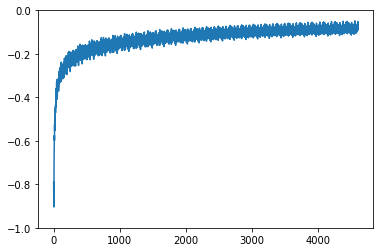

In [3]:
delta_hist =[]

"""
Methode: feed_forward
hier wird feed_forward (Vorsteuerung) durchgefuehrt.
Da kommt den Abruf von Input-Werten und Gewichtungen.
X - Batch von Eingaben
weights - Gewichte
Es wird retuniert: Batch berechneter Ausgaben
"""
def feed_forward(X, weights):
    a = [X]
    for w in weights:
        a.append(np.maximum(a[-1].dot(w),0))
    return a


"""
Methode: grads
hier wird die Gradienten und Vorsteuerung (preforms) 
Mit Hilfe von Backpropagation berechnet.
Diese Funktion berechnet die Gradianten und übergibt die
neue Gewichte zusammen mit den Eingaben.
X: Ein Batch von Inputs
Y: Ein Batch von Labels
weights: Gewichte zur Berechnung des neuen Gradienten
Es wird retuniert: die neuen Gradienten
"""
def grads(X, Y, weights):

    grads = np.empty_like(weights)
    a = feed_forward(X, weights)
    # https://brilliant.org/wiki/backpropagation/ or https://stats.stackexchange.com/questions/154879/a-list-of-cost-functions-used-in-neural-networks-alongside-applications
    delta = a[-1] - Y
    delta_hist.append(np.sum(delta*Y)/len(X))
    grads[-1] = a[-2].T.dot(delta)
    for i in range(len(a)-2, 0, -1):
        delta = (a[i] > 0) * delta.dot(weights[i].T)
        grads[i-1] = a[i-1].T.dot(delta)
    return grads / len(X)

trX, trY, teX, teY = train_images, train_labels, test_images, test_labels
weights = [np.random.randn(*w) * 0.1 for w in [(784, 200), (200,100), (100, 10)]]
num_epochs, batch_size, learn_rate = 26, 340, 0.1
verbose = True

for i in range(num_epochs):
    for j in range(0, len(trX), batch_size):
        X, Y = trX[j:j+batch_size], trY[j:j+batch_size]
        weights -= learn_rate * grads(X, Y, weights)
    prediction_test = np.argmax(feed_forward(teX, weights)[-1], axis=1)    
    if verbose: 
        print ('Count:', i, '; accuracy:', np.mean(prediction_test == np.argmax(teY, axis=1)), '; delta:', delta_hist[-1])
        
plt.plot(delta_hist)
plt.ylim(ymax = 0, ymin= -1)

## Todo: Comprehension
Hopefully, this implementation of a neural network is clear now. As a check answer the following questions (a few sentences, no novels):
  - (2) Which cost function is used, what is its derivation and how is it implemented?
  Answer: softmax function
  - (2) Why are the boundaries of your plot between [-1,0], why it is so noisy, how do you can reduce the noice and what is the difference to a usual plot of a loss function?
  Answer: Für die Reduzierung des Noises muss man die Größe des Batches anpassen, und zwar größer machen. Loss Wert bleibt positive, deswegen kann der Plot zwischen 0 und 1 nicht sein.
  - (2) How does the network implement the backpropagation algorithm?
  Answer: Bei der Backpropagation wird die Kostenfunktion verwendet, um den Fehler unserer output layer zu berechnen. Wir werden die Steigung der Kostenfunktionen in Bezug auf die zweite Gleichung angeben, aber wenn man diese Ergebnisse selbst beweisen möchte, wird die Verwendung der ersten Gleichung empfohlen, da es einfacher ist, damit zu arbeiten.

## Todo: Step towards a NN-Framework
The presented implementation is compact and efficient, but hard to modify or extend. However, a modular design is crucial if you want to experiment with a neural network to understand the influence of its components. Now you make the first changes towards your own 'toy-neural-network-framework', which you should expand in the progress of exercise 03. 

(5) Rework the implementation from above given the classes and methods below. Again, you _do not_ have to re-engineer the whole neural network at this step. Rework the code to match the given specification and do necessary modifications only. For your understanding, you can change the names of the variables to more fitting ones.

Count: 0 ; accuracy: 0.8838 ; delta: -0.23541359783659713
Count: 1 ; accuracy: 0.9121 ; delta: -0.18503312484430684
Count: 2 ; accuracy: 0.9235 ; delta: -0.16376980169683378
Count: 3 ; accuracy: 0.9302 ; delta: -0.15094095178135253
Count: 4 ; accuracy: 0.9355 ; delta: -0.1421669224794075
Count: 5 ; accuracy: 0.9387 ; delta: -0.13389521354190168
Count: 6 ; accuracy: 0.9425 ; delta: -0.12618025932607277
Count: 7 ; accuracy: 0.9453 ; delta: -0.11903168078154351
Count: 8 ; accuracy: 0.9471 ; delta: -0.11328852604435098
Count: 9 ; accuracy: 0.9493 ; delta: -0.10810392577504666
Count: 10 ; accuracy: 0.952 ; delta: -0.10328305013955172
Count: 11 ; accuracy: 0.9535 ; delta: -0.09876837205235024
Count: 12 ; accuracy: 0.9542 ; delta: -0.09479163555737433
Count: 13 ; accuracy: 0.9556 ; delta: -0.09094846074242828
Count: 14 ; accuracy: 0.9566 ; delta: -0.08748362681440633
Count: 15 ; accuracy: 0.9574 ; delta: -0.08392038108424876
Count: 16 ; accuracy: 0.9583 ; delta: -0.08066511028416629
Count: 17

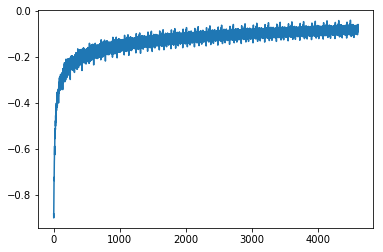

In [12]:
class FullyConnectedNetwork:
    def __init__(self, layers):
        self.layers = layers
        self.weights = [0.1 * np.random.randn(*weight) for weight in self.layers]
        self.delta_hist = []
        
    def forward(self, data):
        dataVar = [data]
        for weight in self.weights:
            dataVar.append(np.maximum(dataVar[-1].dot(weight), 0))       
        return dataVar

    def backward(self, X, Y):
        grads = np.empty_like(self.weights)
        selfForwardX = self.forward(X)
        delta = selfForwardX[-1] - Y
        self.delta_hist.append(np.sum(delta * Y) / len(X))
        grads[-1] = selfForwardX[-2].T.dot(delta)
        
        for i in range(len(selfForwardX) - 2, 0, -1):
            delta = (selfForwardX[i] > 0) * delta.dot(self.weights[i].T)
            grads[i - 1] = selfForwardX[i - 1].T.dot(delta)
        return grads / len(X)

    def predict(self, data):
        return self.forward(data)
            
class Optimizer:
    def __init__(self, network, train_data, train_labels, test_data=None, test_labels=None, epochs=100, batch_size=20, learning_rate=0.01):
        self.network = network
        self.train_data = train_data
        self.train_labels = train_labels
        self.test_data = test_data
        self.test_labels = test_labels
        self.epochs = epochs
        self.batch_size = batch_size
        self.learning_rate = learning_rate
        
    def sgd(self, verbose = True):        
        for i in range(self.epochs):
            for j in range(0, len(self.train_data), self.batch_size):
                X, Y = self.train_data[j:j + self.batch_size], self.train_labels[j:j + self.batch_size]
                self.network.weights = self.network.weights - (self.network.backward(X, Y) * self.learning_rate)

            prediction_test = np.argmax(self.network.predict(self.test_data)[-1], axis=1)
            if verbose: 
                print ('Count:', i, '; accuracy:', np.mean(prediction_test == np.argmax(self.test_labels, axis=1)), '; delta:', self.network.delta_hist[-1])
    
# Following code should run:    
mnist_NN = FullyConnectedNetwork([(784, 200),(200,100),(100, 10)]) 
epochs, batch_size, learning_rate = 26, 340, 0.1
Optimizer(mnist_NN, train_images, train_labels, test_images, test_labels, epochs, batch_size, learning_rate).sgd(True)

plt.plot(mnist_NN.delta_hist)